In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 1 類 為 automobile


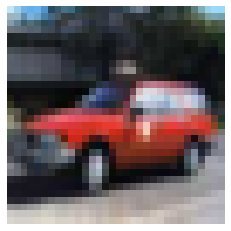

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet121
cnn = DenseNet121(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = BatchNormalization()(cnn.output)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_ResNet121.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.1), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=40,
          validation_split=0.1, callbacks=callback)

Epoch 1/40
150/150 [==============================] - 7s 44ms/step - loss: 1.4031 - accuracy: 0.5033 - val_loss: 1.3565 - val_accuracy: 0.5226
Epoch 2/40
150/150 [==============================] - 5s 30ms/step - loss: 1.1535 - accuracy: 0.5896 - val_loss: 1.2148 - val_accuracy: 0.5674
Epoch 3/40
150/150 [==============================] - 5s 30ms/step - loss: 1.0581 - accuracy: 0.6246 - val_loss: 1.1862 - val_accuracy: 0.5842
Epoch 4/40
150/150 [==============================] - 5s 31ms/step - loss: 0.9715 - accuracy: 0.6549 - val_loss: 1.1185 - val_accuracy: 0.6092
Epoch 5/40
150/150 [==============================] - 5s 30ms/step - loss: 0.9027 - accuracy: 0.6776 - val_loss: 1.0993 - val_accuracy: 0.6180
Epoch 6/40
150/150 [==============================] - 4s 25ms/step - loss: 0.8340 - accuracy: 0.7034 - val_loss: 1.1008 - val_accuracy: 0.6244
Epoch 7/40
150/150 [==============================] - 4s 25ms/step - loss: 0.7727 - accuracy: 0.7251 - val_loss: 1.1400 - val_accuracy: 0.6098

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1181 - accuracy: 0.6096


[1.118051290512085, 0.6096000075340271]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[4.80682822e-03, 5.18428273e-02, 1.71114206e-02, ...,
        2.10401304e-02, 2.44274233e-02, 3.12382460e-01],
       [5.22084311e-02, 2.41652340e-01, 3.31141375e-04, ...,
        1.89238381e-05, 7.00600624e-01, 5.04792109e-03],
       [1.15276694e-01, 9.71519109e-03, 5.44529967e-03, ...,
        8.70449003e-03, 7.74778724e-01, 1.11658070e-02],
       ...,
       [2.43659582e-04, 3.95757743e-05, 7.60893449e-02, ...,
        3.03795319e-02, 5.99873136e-04, 7.80570321e-04],
       [1.08700223e-01, 2.22434010e-02, 6.74041629e-01, ...,
        2.45243087e-02, 4.39789001e-04, 2.56343745e-04],
       [4.99385060e-04, 8.04702868e-04, 1.83738640e-03, ...,
        9.51312423e-01, 9.97509342e-04, 1.13335170e-03]], dtype=float32)

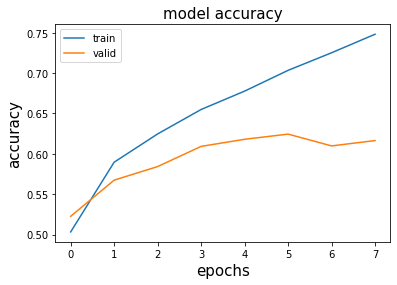

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

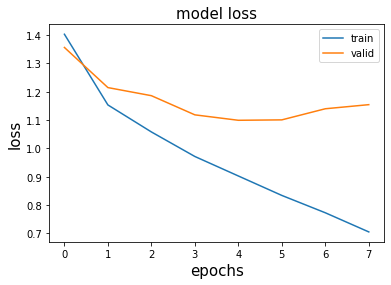

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy =0.587
#### 去掉一個 Dense 128 val_accuracy=0.568
#### 加了 dorpout(0.25) val_accuracy=0.59
#### 加了 batch_normlization val_accuracy=0.61